In [2]:
import pandas as pd

data = pd.read_csv('2018_crime.csv')
data = data.dropna()
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11221611,JB139411,2/3/2018 0:26,046XX W MONROE ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,28,25,08B,1145407.0,1899159.0,2018,5/4/2018 15:51,41.879290,-87.741554,"(41.879290415, -87.74155445)"
1,11221678,JB139473,2/3/2018 2:10,039XX S WENTWORTH AVE,460,BATTERY,SIMPLE,SIDEWALK,False,False,...,3,37,08B,1175580.0,1879076.0,2018,5/4/2018 15:51,41.823557,-87.631367,"(41.823556849, -87.631367455)"
2,11221737,JB139513,2/3/2018 3:26,055XX W POTOMAC AVE,560,ASSAULT,SIMPLE,APARTMENT,False,True,...,37,25,08A,1139090.0,1908109.0,2018,5/4/2018 15:51,41.903968,-87.764532,"(41.903967515, -87.764531903)"
3,11221740,JB139533,2/3/2018 4:50,018XX S HARDING AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,VEHICLE NON-COMMERCIAL,False,True,...,24,29,08B,1150351.0,1890652.0,2018,5/4/2018 15:51,41.855851,-87.723623,"(41.855851238, -87.723622599)"
4,11221800,JB139583,2/3/2018 1:00,092XX S SAGINAW AVE,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,True,...,7,48,26,1195488.0,1844215.0,2018,5/4/2018 15:51,41.727426,-87.559484,"(41.727426452, -87.559484437)"


In [3]:
new_data = data.drop(['ID', 'Case Number', 'IUCR', 'Description', 'Domestic', 'Beat', 'District', 'Ward', 'FBI Code'
                      , 'X Coordinate', 'Y Coordinate', 'Updated On', 'Latitude', 'Longitude', 'Location','Community Area'], axis = 1)
new_data.head()

,Date,Block,Primary Type,Location Description,Arrest,Year
0,2/3/2018 0:26,046XX W MONROE ST,BATTERY,RESIDENCE,False,2018
1,2/3/2018 2:10,039XX S WENTWORTH AVE,BATTERY,SIDEWALK,False,2018
2,2/3/2018 3:26,055XX W POTOMAC AVE,ASSAULT,APARTMENT,False,2018
3,2/3/2018 4:50,018XX S HARDING AVE,BATTERY,VEHICLE NON-COMMERCIAL,False,2018
4,2/3/2018 1:00,092XX S SAGINAW AVE,OTHER OFFENSE,STREET,False,2018


In [4]:
new_data.to_csv("chicago_crime.csv", index = 0)

In [5]:
new_data.shape

(685, 6)

In [13]:
from pandas import DataFrame
import csv

theft_data = DataFrame(columns=['Date','Block','Location Description','Arrest'])

with open('chicago_crime.csv') as f:
    reader = csv.DictReader(f, delimiter=',')
    for row in reader:
        crime_type = row['Primary Type']
        i = 0;
        if crime_type == 'BATTERY':
            dict1 = {}
            #dict1.update(row['Date'], row['Block'], row['Location Description'], row['Arrest'])
            
theft_data.head()

,Date,Block,Location Description,Arrest


In [14]:
battery_data = pd.read_csv('battery_data.csv')
battery_data.head()

,Date,Description,Location Description,Arrest,Domestic,District
0,2/3/2018,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,11
1,2/3/2018,SIMPLE,SIDEWALK,False,False,9
2,2/3/2018,DOMESTIC BATTERY SIMPLE,VEHICLE NON-COMMERCIAL,False,True,10
3,2/3/2018,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,8
4,2/3/2018,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,5


In [74]:
%matplotlib inline
from sklearn.model_selection import train_test_split

In [75]:
y = battery_data['Domestic'] 
X = battery_data.drop('Domestic', axis = 1)

# drop any column that uses strings
X = X.drop('Date', axis = 1)
X = X.drop('Description', axis = 1)
X = X.drop('Location Description', axis = 1)
X = X.drop('Arrest', axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Best hyperparameter, maxdepth = 5
Test Accuracy = 0.5277777777777778


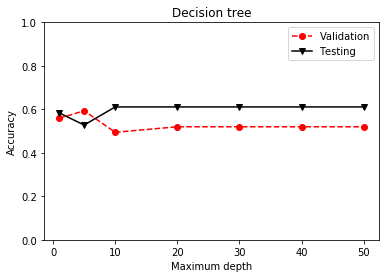

In [76]:
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

maxdepths = [1,5,10,20,30,40,50]
validationAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
index = 0

np.random.seed(1)
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(clf, X_train, Y_train, cv=10)
    validationAcc[index] = np.mean(scores)
    clf.fit(X_train, Y_train)
    Y_predTest = clf.predict(X_test)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
plt.plot(maxdepths, validationAcc, 'ro--', maxdepths, testAcc, 'kv-')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.title('Decision tree')
plt.legend(['Validation','Testing'])
plt.ylim([0.0,1.0])

bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter, maxdepth =', maxdepths[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])


Best hyperparameter, k = 1
Test Accuracy = 0.5277777777777778


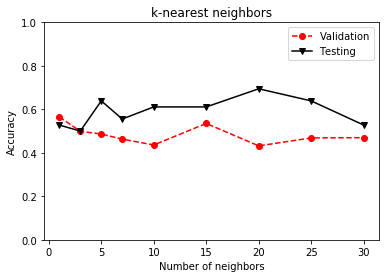

In [77]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1,3,5,7,10,15,20,25,30]
validationAcc = np.zeros(len(numNeighbors))
testAcc = np.zeros(len(numNeighbors))
index = 0

np.random.seed(1)
for nn in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=nn)
    scores = cross_val_score(clf, X_train, Y_train, cv=10)
    validationAcc[index] = np.mean(scores)
    clf.fit(X_train, Y_train)
    Y_predTest = clf.predict(X_test)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
plt.plot(numNeighbors, validationAcc, 'ro--', numNeighbors, testAcc, 'kv-')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('k-nearest neighbors')
plt.legend(['Validation','Testing'])
plt.ylim([0.0,1.0])

bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter, k =', numNeighbors[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])

Best hyperparameter, C = 0.1
Test Accuracy = 0.5555555555555556


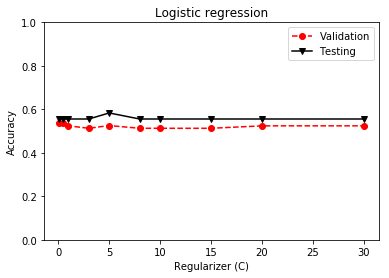

In [78]:
from sklearn import linear_model

regularizers = [0.1,0.5,1,3,5,8,10,15,20,30]
validationAcc = np.zeros(len(regularizers))
testAcc = np.zeros(len(regularizers))
index = 0

np.random.seed(1)
for C in regularizers:
    clf = linear_model.LogisticRegression(C= C, solver='liblinear', penalty='l1')
    scores = cross_val_score(clf, X_train, Y_train, cv=10)
    validationAcc[index] = np.mean(scores)
    clf.fit(X_train, Y_train)
    Y_predTest = clf.predict(X_test)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
plt.plot(regularizers, validationAcc, 'ro--', regularizers, testAcc, 'kv-')
plt.xlabel('Regularizer (C)')
plt.ylabel('Accuracy')
plt.title('Logistic regression')
plt.legend(['Validation','Testing'])
plt.ylim([0.0,1.0])

bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter, C =', regularizers[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])

In [79]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numEstimators = 500
np.random.seed(1)
clf = ensemble.RandomForestClassifier(n_estimators=numEstimators)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print('Test Accuracy =', accuracy_score(Y_test, Y_pred))

Test Accuracy = 0.6111111111111112


In [80]:
from surprise import Dataset
from surprise import Reader

domestic_data = pd.read_csv('battery_data.csv')
reader = Reader(line_format='user item rating', sep=',', rating_scale=(1,5))
data = Dataset.load_from_df(domestic_data[['Location Description','Domestic', 'District']], reader=reader)
data.raw_ratings[:5]

[('RESIDENCE', True, 11.0, None),
 ('SIDEWALK', False, 9.0, None),
 ('VEHICLE NON-COMMERCIAL', True, 10.0, None),
 ('RESIDENCE', True, 8.0, None),
 ('APARTMENT', True, 5.0, None)]

In [82]:
from surprise import NMF
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.5, random_state=1)

algo = NMF(n_factors=20, n_epochs=200)
algo.fit(trainset)

In [83]:
from surprise import accuracy

pred = algo.test(testset)
accuracy.rmse(pred), accuracy.mae(pred)

RMSE: 8.9521
MAE:  6.6479


(8.95209359239911, 6.647909472346279)

Processing for if the person will be arrested

In [63]:
from sklearn.model_selection import train_test_split
%matplotlib inline

y2 = battery_data['Arrest'] 
X2 = battery_data.drop('Arrest', axis = 1)

# drop any column that uses strings
X2 = X2.drop('Date', axis = 1)
X2 = X2.drop('Description', axis = 1)
X2 = X2.drop('Location Description', axis = 1)
X2 = X2.drop('Domestic', axis = 1)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, y2, test_size=0.3, random_state=1)

Best hyperparameter, maxdepth = 5
Test Accuracy = 0.8055555555555556


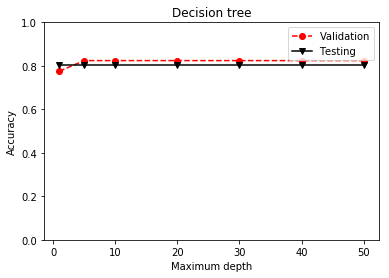

In [64]:
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

maxdepths = [1,5,10,20,30,40,50]
validationAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
index = 0

np.random.seed(1)
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(clf, X2_train, Y2_train, cv=10)
    validationAcc[index] = np.mean(scores)
    clf.fit(X2_train, Y2_train)
    Y2_predTest = clf.predict(X2_test)
    testAcc[index] = accuracy_score(Y2_test, Y2_predTest)
    index += 1
    
plt.plot(maxdepths, validationAcc, 'ro--', maxdepths, testAcc, 'kv-')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.title('Decision tree')
plt.legend(['Validation','Testing'])
plt.ylim([0.0,1.0])

bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter, maxdepth =', maxdepths[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])


Best hyperparameter, k = 7
Test Accuracy = 0.8055555555555556


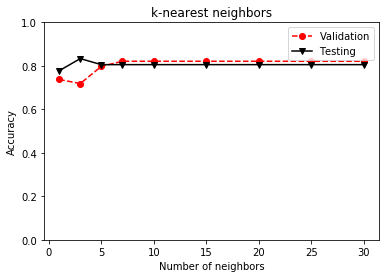

In [65]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1,3,5,7,10,15,20,25,30]
validationAcc = np.zeros(len(numNeighbors))
testAcc = np.zeros(len(numNeighbors))
index = 0

np.random.seed(1)
for nn in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=nn)
    scores = cross_val_score(clf, X2_train, Y2_train, cv=10)
    validationAcc[index] = np.mean(scores)
    clf.fit(X2_train, Y2_train)
    Y2_predTest = clf.predict(X2_test)
    testAcc[index] = accuracy_score(Y2_test, Y2_predTest)
    index += 1
    
plt.plot(numNeighbors, validationAcc, 'ro--', numNeighbors, testAcc, 'kv-')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('k-nearest neighbors')
plt.legend(['Validation','Testing'])
plt.ylim([0.0,1.0])

bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter, k =', numNeighbors[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])

Best hyperparameter, C = 0.1
Test Accuracy = 0.8055555555555556


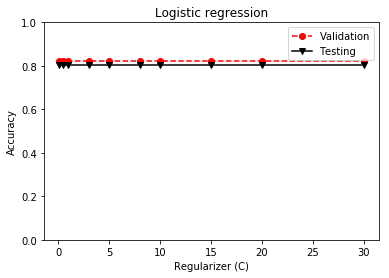

In [66]:
from sklearn import linear_model

regularizers = [0.1,0.5,1,3,5,8,10,15,20,30]
validationAcc = np.zeros(len(regularizers))
testAcc = np.zeros(len(regularizers))
index = 0

np.random.seed(1)
for C in regularizers:
    clf = linear_model.LogisticRegression(C= C, solver='liblinear', penalty='l1')
    scores = cross_val_score(clf, X2_train, Y2_train, cv=10)
    validationAcc[index] = np.mean(scores)
    clf.fit(X2_train, Y2_train)
    Y2_predTest = clf.predict(X2_test)
    testAcc[index] = accuracy_score(Y2_test, Y2_predTest)
    index += 1
    
plt.plot(regularizers, validationAcc, 'ro--', regularizers, testAcc, 'kv-')
plt.xlabel('Regularizer (C)')
plt.ylabel('Accuracy')
plt.title('Logistic regression')
plt.legend(['Validation','Testing'])
plt.ylim([0.0,1.0])

bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter, C =', regularizers[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])

In [67]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numEstimators = 500
np.random.seed(1)
clf = ensemble.RandomForestClassifier(n_estimators=numEstimators)
clf.fit(X2_train, Y2_train)
Y2_pred = clf.predict(X2_test)
print('Test Accuracy =', accuracy_score(Y2_test, Y2_pred))

Test Accuracy = 0.8055555555555556


In [68]:
from surprise import Dataset
from surprise import Reader

arrest_data = pd.read_csv('battery_data.csv')
reader = Reader(line_format='user item rating', sep=',', rating_scale=(1,5))
data = Dataset.load_from_df(arrest_data[['Location Description','Domestic', 'District']], reader=reader)
data.raw_ratings[:5]

[('RESIDENCE', True, 11.0, None),
 ('SIDEWALK', False, 9.0, None),
 ('VEHICLE NON-COMMERCIAL', True, 10.0, None),
 ('RESIDENCE', True, 8.0, None),
 ('APARTMENT', True, 5.0, None)]

In [88]:
from surprise import NMF
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.5)

algo = NMF(n_factors=20, n_epochs=200)
algo.fit(trainset)

In [87]:
from surprise import accuracy

pred = algo.test(testset)
accuracy.rmse(pred), accuracy.mae(pred)

RMSE: 8.9526
MAE:  6.6477


(8.952575377530705, 6.647673476742477)